# Exemplary Analysis of Charging


In [1]:
import maicos
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
from scipy.optimize import curve_fit
import scipy as sc
# plt.style.use('seaborn-poster')

In [2]:
def load_universe(path_topology, path_trajectory):
    atom_groups = {}
    u = mda.Universe(path_topology, path_trajectory)
    atom_groups['water'] = u.select_atoms('type 2 or type 3')
    atom_groups['graphene'] = u.select_atoms('type 1')
    atom_groups["solution"] = u.select_atoms("type 2 or type 3 or type 4 or type 5") 
    atom_groups["ions"] = u.select_atoms("type 4 or type 5")
    return u, atom_groups

In [3]:
u, atom_groups = load_universe('./structure.data', './wallcharge.lammpstrj')

/tikhome/mgern/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


## Visualize the System in Python

In [4]:
# nv.show_mdanalysis(u)

## Analyse the Solute Polarization

In [5]:
def calc_dipole_moment_over_time(atomgroup_fluid):
    universe = atomgroup_fluid.universe # access to the universe object
    
    # prepare polarization array
    ms = np.empty((len(universe.trajectory), 1))
    
    for i, ts in enumerate(universe.trajectory):
        
        # calculate the dipole of the fluid (excluding the graphene walls!)
        ms[i] = np.mean(np.dot(atomgroup_fluid.charges, atomgroup_fluid.positions))
    return ms

In [6]:

dipole_ts = calc_dipole_moment_over_time(atom_groups['graphene'])

# Task: Calculate the Charging Time:

Your task is now to calculate the charging time.

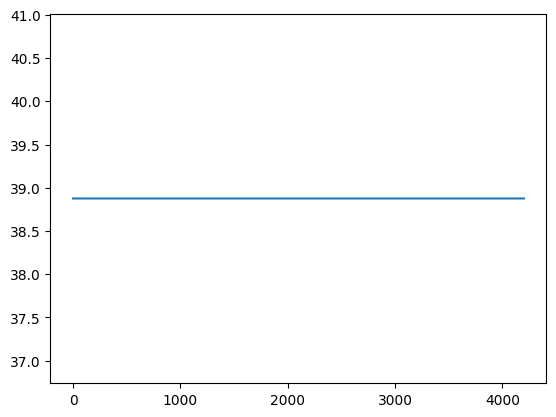

In [7]:
plt.plot(np.linalg.norm(dipole_ts,axis=-1))
def exponential_fit(t,tau_water,tau_ions,Q_infty,t_delay):
    return Q_infty*(1-np.exp(-t/tau_water)) + Q_infty*(1-np.exp(-(t-t_delay)/tau_ions))

# params = sc.optimize.curve_fit(exponential_fit, np.arange(len(dipole_ts)), np.linalg.norm(dipole_ts,axis=-1), p0=[1,1,1,1])
# plt.plot(np.arange(len(dipole_ts)), exponential_fit(np.arange(len(dipole_ts)), *params[0]), label='fit')